<a href="https://colab.research.google.com/github/natalia973/Data-Science-Data-Analytics/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regressão Linear - Simples

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

base = pd.read_csv("/content/cars.csv" )
base.shape

(50, 3)

In [95]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [96]:
base = base.drop(["Unnamed: 0"], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [100]:
# Definição das variáveis X e Y , dividindo - as entre variáveis dependentes e independentes.
# Y é a variável dependente , na posição 0 das colunas, no caso a DISTÂNCIA.
# X é a variável independente , na posição 1 das colunas ,  no caso a VELOCIDADE.
X = base.iloc[:, 1].values
Y = base.iloc[:, 0].values

In [101]:
# Correlação entre X e Y - CORRELAÇÃO NÃO É CAUSA.
Correlacao = np.corrcoef(X , Y)
Correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

É possível perceber que a correlação é positiva e que há muita correlação (0.806...), é uma correlação positiva e forte.

In [102]:
# Formato de matriz com uma coluna a mais
X = X.reshape(-1 , 1)
modelo = LinearRegression()
modelo.fit(X,Y)

LinearRegression()

In [108]:
# Visualização dos coeficientes.
modelo.intercept_

np.float64(8.283905641787172)

In [106]:
modelo.coef_
# Inclinação da reta

array([0.16556757])

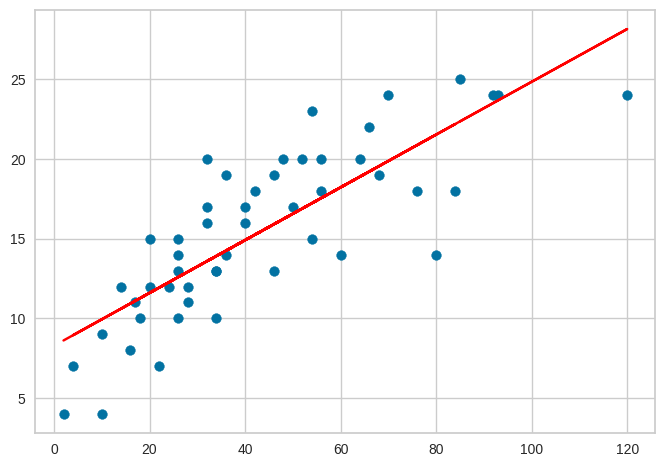

In [109]:
 # Geração do gráfico com os pontos reais e as previsões.
plt.scatter(X, Y)
plt.plot(X , modelo.predict(X) , color = 'red')

In [116]:
# Previsão com 22 pés de distância:
# interceptação * inclinação * valor de distância
# Qual velocidade se levou 22 pés pra parar?
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [117]:
modelo.predict([[22]])

array([11.92639228])

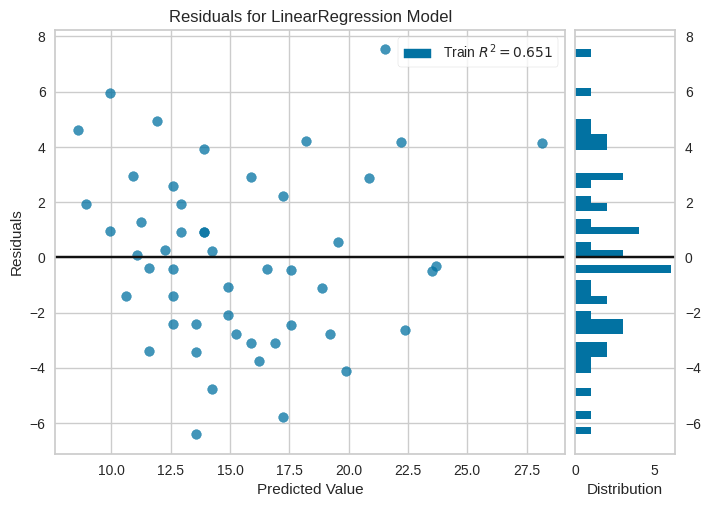

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [118]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, Y)
visualizador.poof()